Statistical Theory --- Final Project
---
**Initial Data Exploration Notebook**

By Adam Aharony and Adva Davidof.

## Initialisation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset from csv
df = pd.read_csv("titanic.csv")
# Dropping unnecessary columns
df.drop(
    columns=[
        "PassengerId",
        "Name",
        "Ticket",
        "Cabin",
        "Embarked"
    ],
    inplace=True
)

# Desired data type for certain columns
types = {
    "Survived": "bool",
    "Pclass": "int8",
    "SibSp": "int8",
    "Parch": "int8",
}
for column, dtype in types.items():
    df[column] = df[column].astype(dtype)

# New 'additional family' feature
df["Family"] = df["SibSp"] + df["Parch"]

In [3]:
# Overall survival rate
survival_rate = df["Survived"].mean()
print(f"Overall survival rate {survival_rate:.2%}")
df

Overall survival rate 38.38%


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Family
0,False,3,male,22.0,1,0,7.2500,1
1,True,1,female,38.0,1,0,71.2833,1
2,True,3,female,26.0,0,0,7.9250,0
3,True,1,female,35.0,1,0,53.1000,1
4,False,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,False,2,male,27.0,0,0,13.0000,0
887,True,1,female,19.0,0,0,30.0000,0
888,False,3,female,NaN,1,2,23.4500,3
889,True,1,male,26.0,0,0,30.0000,0


In [4]:
# Float precision variable, per column
DEFAULT_PRECISION = 2
COLOURS = {
    "blue": "#008AF3",
    "mid_blue": "#006AB2",
    "dark_blue": "#004676",
    "pink": "#FF027A",
    "red": "#B71C1C",
    "green": "#1B5E20"
}

rc = {
    "text.color": "black",
    "axes.labelcolor": "black",
    "legend.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    palette="muted",
    rc=rc
)

## Dataset Correlation

In [5]:
# Calculate the correlation matrix after replacing the "Sex" column values with numeric ones
corr = df.replace({
    "Sex": {
        "male": 0,
        "female": 1
    }
}).corr(method="spearman")

# Sort the correlation values of the "Survived" column in descending order
sorted_corr = corr["Survived"].abs().sort_values(ascending=False)
sorted_corr = pd.DataFrame(sorted_corr).rename(columns={"Survived": "|Correlation|"}).drop("Survived")

# Format for LaTeX output
styler = sorted_corr.style
styler.format_index("\\textbf{{{}}}", axis=0, escape="latex")
# styler.format(
#     subset=None,
#     formatter=lambda x: f"{x:.{DEFAULT_PRECISION}e}"
# )
# Generate LaTeX table and save it to a file
styler.to_latex("tables/correlation.tex", hrules=True)

# Display the sorted correlation values
sorted_corr

/tmp/ipykernel_30009/306871529.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr = df.replace({


,|Correlation|
Sex,0.543351
Pclass,0.339668
Fare,0.323736
Family,0.165463
Parch,0.138266
SibSp,0.088879
Age,0.052565


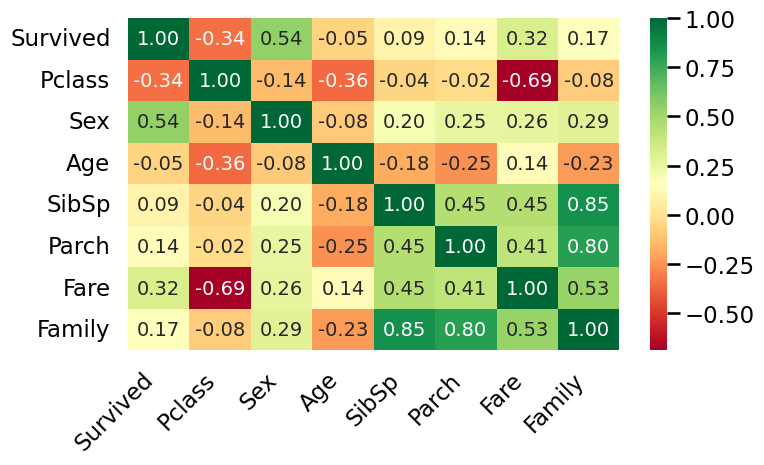

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
# Create a heatmap of the correlation matrix
sns.heatmap(
    corr,
    annot=True,  # Display the correlation values on the heatmap
    cmap="RdYlGn",  # Set the color map
    fmt=".2f",  # Format the correlation values to 2 decimal places
    annot_kws={"size": 14},  # Set the font size of the annotations
    cbar=True,
    ax=ax  # Specify the axes to plot the heatmap on
)
# Set the x-axis tick labels to be rotated and aligned to the right
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
# Explicitly set the colorbar's rasterization to False
ax.collections[0].colorbar.solids.set_rasterized(False)

# Save the figure
plt.tight_layout()
plt.savefig("figures/correlation.pdf", bbox_inches="tight")
plt.savefig("figures/correlation.pgf", bbox_inches="tight")

## Overall Survival Rate

### Overall survival rate (raw)

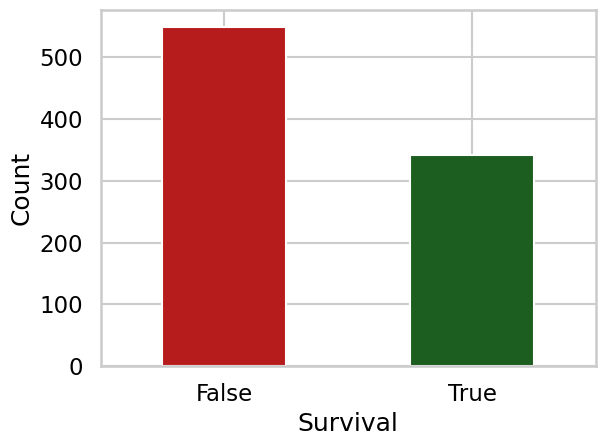

In [7]:
# Calculate the count of each survival category
survival_rate_overall = df.groupby(["Survived"]).size()

# Plotting the overall survival rate (raw)
survival_rate_overall.plot(
    xlabel="Survival",
    ylabel="Count",
    kind="bar",
    color=[COLOURS["red"], COLOURS["green"]]
)
# Rotate x-axis labels
plt.xticks(rotation=0)

# Save the figure
plt.tight_layout()
plt.savefig("figures/survival_raw.pdf", bbox_inches="tight")
plt.savefig("figures/survival_raw.pgf", bbox_inches="tight")

### Overall survival rate (normalised)

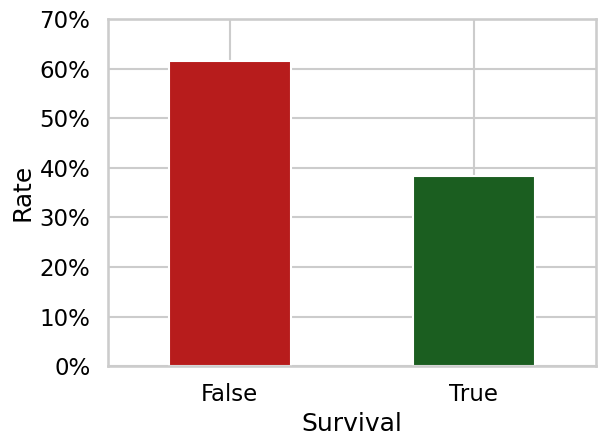

In [8]:
# Calculate the normalized count of each survival category
survival_rate_overall = df["Survived"].value_counts(normalize=True)

# Plotting the overall survival rate (normalised)
survival_rate_overall.plot(
    xlabel="Survival",
    ylabel="Rate",
    kind="bar",
    color=[COLOURS["red"], COLOURS["green"]]
)
# Change y-labels to percentages
y_ticks = [f"{y:.0%}" for y in plt.yticks()[0]]
plt.yticks(plt.yticks()[0], y_ticks)
# Rotate x-axis labels
plt.xticks(rotation=0)

# Save the figure
plt.tight_layout()
plt.savefig("figures/survival_normalised.pdf", bbox_inches="tight")
plt.savefig("figures/survival_normalised.pgf", bbox_inches="tight")